In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
! pip install visualkeras

# 1. Importing Necessary Libraies - Import Thư Viện

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
from numpy.random import seed
import random
import time

# Loading libraries for visualization
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import visualkeras
from mpl_toolkits.mplot3d import Axes3D

# Loading libraries to read images
from PIL import Image
from skimage.io import imread
import cv2

# Loading keras for CNN
from tensorflow import keras
from keras import layers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, Input

# Loading necessary libraries from sklearns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Load Dữ Liệu

In [ ]:
seed(111)

In [ ]:
df_path = '/content/drive/MyDrive/GTSRB dataset'
train_path = '/content/drive/MyDrive/GTSRB dataset/Train'
df_train = pd.read_csv('/content/drive/MyDrive/GTSRB dataset/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/GTSRB dataset/Test.csv')
df_meta = pd.read_csv('/content/drive/MyDrive/GTSRB dataset/Meta.csv')

Load labels

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

Load data train

In [ ]:
data_list = []
lables_list = []
classes_list = 43
for i in range (classes_list):
    i_path = os.path.join(train_path, str(i)) #0-42
    for img in os.listdir(i_path):
      try:
        im = Image.open(i_path + '/' + img)
        im = im.resize((32, 32))
        im = np.array(im)
        data_list.append(im)
        lables_list.append(i)
      except:
        print("Error loading image")
data = np.array(data_list)
lables = np.array(lables_list)

In [ ]:
print(data.shape, lables.shape)


(39209, 32, 32, 3) (39209,)


In [ ]:
data[1].shape # xem kích thước một ảnh, 32,32 : chiều dài chiều rộng ảnh, 3: 3 chanel khi scale lại sẽ là hình màu xám -> 1 

(32, 32, 3)

In [ ]:
data[1] # thông số điểm ảnh của một ảnh trong ma trận 32x32;
        # Mỗi điểm ảnh tương ứng với 3 mã màu trong rbg(x,x1,x2)

array([[[185,  68,  60],
        [191,  51,  39],
        [189,  50,  41],
        ...,
        [163,  34,  26],
        [156,  35,  27],
        [150,  40,  31]],

       [[189,  54,  43],
        [192,  52,  41],
        [194,  51,  43],
        ...,
        [177,  79,  67],
        [172,  85,  77],
        [166,  88,  86]],

       [[176,  52,  38],
        [172,  52,  42],
        [184,  52,  40],
        ...,
        [136, 122, 107],
        [130, 117, 103],
        [118, 112, 107]],

       ...,

       [[ 47,  67, 106],
        [ 46,  69, 106],
        [ 45,  68, 105],
        ...,
        [ 72,  72,  67],
        [ 86,  83,  72],
        [ 87,  82,  68]],

       [[ 38,  56,  74],
        [ 39,  56,  84],
        [ 38,  57,  85],
        ...,
        [ 73,  75,  66],
        [ 85,  81,  72],
        [ 83,  78,  71]],

       [[ 46,  69,  99],
        [ 47,  68, 106],
        [ 46,  68, 109],
        ...,
        [ 91,  91,  74],
        [ 85,  80,  65],
        [ 71,  64,  63]]

Shuffle data train

In [ ]:
X_train, Y_train = shuffle(data, lables) #Giúp máy học trans modle tốt hơn. 
                                         #Trộn từng dòng (dòng gồm ảnh, nhãn của ảnh)

In [ ]:
print("Train dataset: ", X_train.shape, Y_train.shape)

Train dataset:  (39209, 32, 32, 3) (39209,)


Load data test

older

In [ ]:
#Y_test = df_test["ClassId"].values
#test_images = df_test["Path"].values

#output = list()
#for img in test_images:
    #image = load_img(os.path.join(df_path, img), target_size=(32, 32))
    #output.append(np.array(image))

#X_test = np.array(output)

new-ver1

In [ ]:
Y_test = df_test["ClassId"].values

In [ ]:
Y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
test_images = df_test["Path"].values
data = []
for img in test_images:
    im = Image.open(df_path + '/' + img)
    im = im.resize((32, 32))
    im = np.array(im)
    data.append(im)
X_test = np.array(data)  


In [ ]:
print("Test dataset", X_test.shape, Y_test.shape)

Test dataset (12630, 32, 32, 3) (12630,)


#3. Data Description - Mô Tả Dữ Liệu

In [ ]:
df_train.describe() #Mô tả bộ dữ liệu

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [ ]:
df_train.info() # xem thông tin bộ dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [ ]:
df_train.isnull().sum() # Kiểm tra xem có thành phần không có giá trị (null) không

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

#4. Data Visualization - Trực Quan Hóa Dữ Liệu

Dataset

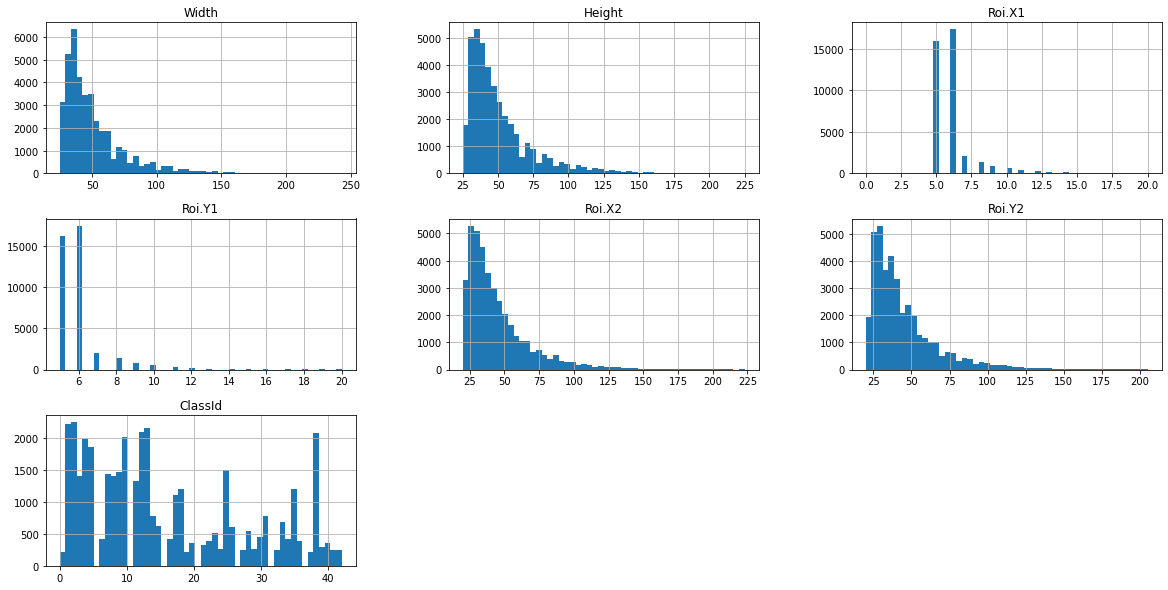

In [ ]:
df_train.hist(bins=50, figsize=(20,10))
plt.show()

Number of images in each ClassId

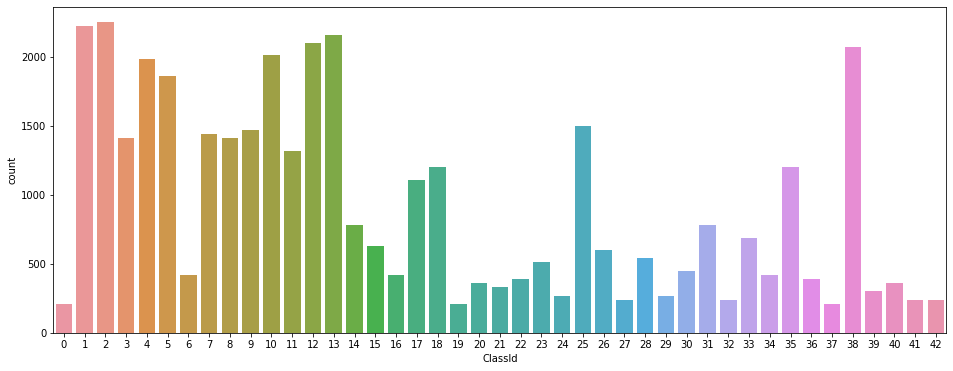

In [ ]:
# đếm số lượng hình ảnh thuộc 42 nhãn  
plt.figure(figsize=(16,6)) 
sns.countplot(x = df_train['ClassId'])

Visualizing all the defferent signs in Meta

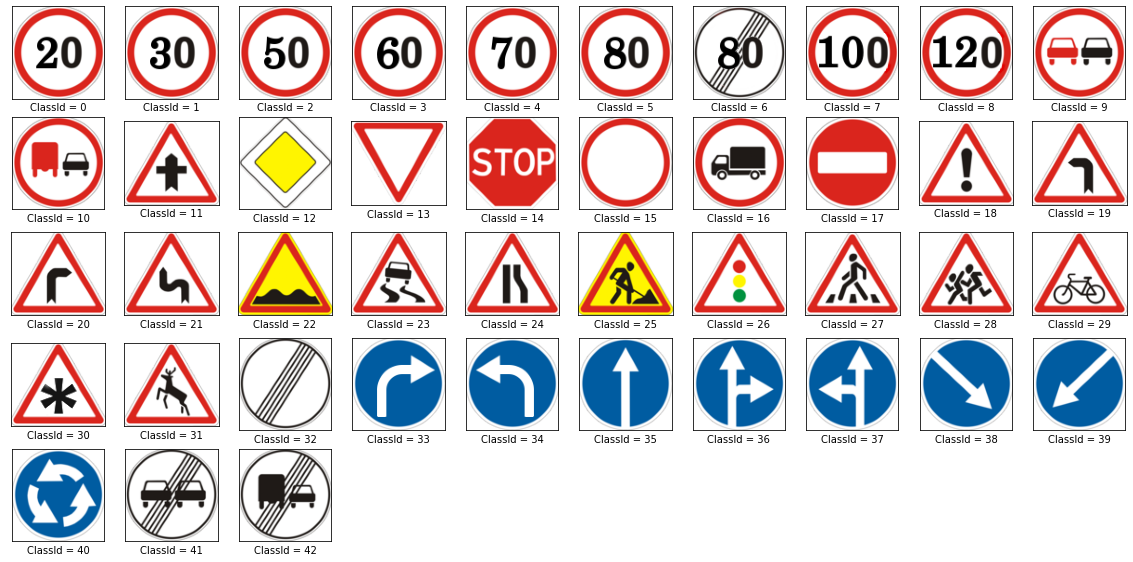

In [ ]:
plt.figure(figsize=(20,20)) #chỉ ra sự khác nhau của bản mate và đời thực (train)
for i in range(0, 43):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    Path = df_path + '/Meta/{}.png'.format(i)
    img = plt.imread(Path)
    plt.xlabel('ClassId = {}'.format(i))
    plt.imshow(img)

Visualizing all the defferent signs in Train

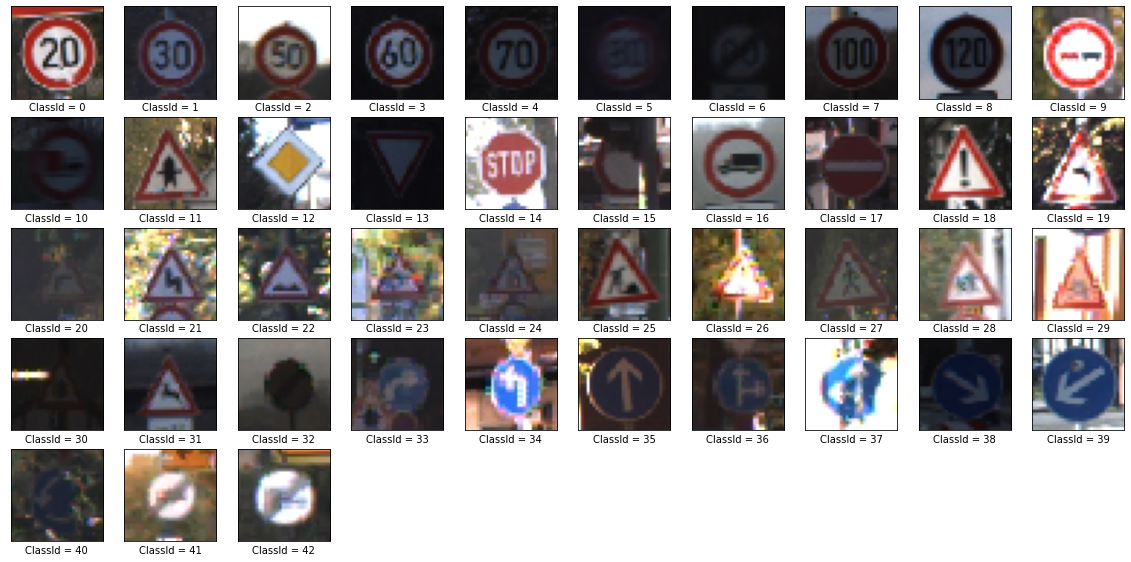

In [ ]:
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(20,20))
index = 0
for i in range(0, 43):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(32, 32))
    plt.xlabel('ClassId = {}'.format(i))
    plt.imshow(img)
plt.show()

#5. Preparing The Data - Chuẩn Bị Dữ Liệu

In [ ]:
# Creating copy of train and test set for cnn
# cần copy bộ dữ liệu ra để xử lí theo mỗi mô hình riêng, mà không ảnh hưởng tới bộ dữ liệu chính

X_train_knn = np.copy(X_train)
X_test_knn = np.copy(X_test)

X_train_cnn = np.copy(X_train)
X_test_cnn = np.copy(X_test)

X_train_svm = np.copy(X_train)
X_test_svm = np.copy(X_test)

X_train_rf = np.copy(X_train)
X_test_rf = np.copy(X_test)


In [ ]:
#Dimensions of train and test data

print(X_train_knn.shape, Y_train.shape, X_test_knn.shape,Y_test.shape)
print(X_train_cnn.shape, Y_train.shape, X_test_cnn.shape,Y_test.shape) 
print(X_train_svm.shape, Y_train.shape, X_test_svm.shape,Y_test.shape)
print(X_train_rf.shape, Y_train.shape, X_test_rf.shape,Y_test.shape) 

(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)


In [ ]:
# Resizing images to fit SVM and RF and KNN
#resize hình để phù hợp với svm và rf
X_train_knn.resize(39209, 32*32*3)
X_test_knn.resize(12630, 32*32*3)

X_train_svm.resize(39209, 32*32*3)
X_test_svm.resize(12630, 32*32*3)

X_train_rf.resize(39209, 32*32*3)
X_test_rf.resize(12630, 32*32*3)

In [ ]:
# Normaliazing data for SVM and RF and KNN
# ** Hỏi lại: scale lại dữ liệu, chia nhỏ dữ liệu lại trong khoảng (-1,1) giúp xử lí dữ liệu nhanh hơn
X_train_knn = preprocessing.scale(X_train_knn)
X_test_knn = preprocessing.scale(X_test_knn)

X_train_svm = preprocessing.scale(X_train_svm)
X_test_svm = preprocessing.scale(X_test_svm)

X_train_rf = preprocessing.scale(X_train_rf)
X_test_rf = preprocessing.scale(X_test_rf)

In [ ]:
# Spliting data for CNN and KNN
# chia dữ liệu thành 2 tệp train và test
# test_size = 0.2 => train: 80%, val 20%
# random_state = 42 => 42 lần random
# xem scale : https://ndquy.github.io/posts/cac-phuong-phap-scaling/?fbclid=IwAR3HbTWxl3TamLHK3P4jHIHaVwLELEx0bYPeE0tZBAz7K9Cn-FuFgsVQeWU
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train, Y_train, test_size=0.2, random_state = 42)
print(X_train_cnn.shape, X_val_cnn.shape, Y_train_cnn.shape, Y_val_cnn.shape)


(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [ ]:
X_train_svm[1] # xem thử sau khi scale được gì

array([-0.85700836, -0.8430115 , -0.74855   , ..., -0.84179872,
       -0.80235094, -0.69903447])

In [ ]:
#Converting the class labels into categorical variables for CNN and KNN

Y_train_knn = to_categorical(Y_train, 43)
Y_test_knn = to_categorical(Y_test, 43)

Y_train_cnn = to_categorical(Y_train, 43)
Y_val_cnn = to_categorical(Y_val_cnn, 43) 

In [ ]:
print(Y_test)

[16  1 38 ...  6  7 10]


# 6. Implementation of Algorithms

In [ ]:
# Creating blank dataframe to store model scores
#Tạo khung dữ liệu trống để lưu trữ điểm số của mô hình
df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)','Time (mins)'])

###6.1 K-Nearest Neighbors (KNN)

In [ ]:
tic = time.perf_counter() #tính thời gian?????

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_knn, Y_train_knn)

#svm_clf.fit(X_train_svm, Y_train) # QUAN TRỌNG
toc = time.perf_counter()
m_knn, s_knn = divmod((toc - tic), 60)
time_knn=float(str(str(int(m_knn))+"."+str(int(m_knn))))



In [ ]:
Y_pred_knn = knn_clf.predict(X_test_knn)

In [ ]:
Y_pred_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_test_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_pred_knn 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_pred_knn = np.argmax(Y_pred_knn, axis = 1)

In [ ]:
# Calculating recall, precision, f1 score and accuracy of KNN
#Tính toán thu hồi, độ chính xác, điểm f1 (nhiều cách khác nhau)=> độ chính xác của KNN
import sklearn.metrics as metrics
recall_knn = metrics.recall_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "Recall", recall_knn]

precision_knn = metrics.precision_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "Precision", precision_knn]

f1_knn = metrics.f1_score(Y_test, Y_pred_knn, average='macro')
df_scores.loc[len(df_scores)] = ["KNN", "F1", f1_knn]

acc_knn=metrics.accuracy_score(Y_test, Y_pred_knn)
df_scores.loc[len(df_scores)] = ["KNN", "Accuracy", acc_knn]

df_model.loc[len(df_model)] = ["KNN", acc_knn*100, time_knn]
acc_knn

0.3615993665874901

In [ ]:
# Classification report for KNN
# in ra kết quả do độ chính xác của từng nhãn (0-42) theo nhiều phương pháp tính khác nhau
# Y_test so sánh với Y_pred: so sánh kết quả test với kết quả dự đoán
print("Classification report for KNN classifier {0}:\n{1}\n".format(knn_clf, metrics.classification_report(Y_test, Y_pred_knn)))

Classification report for KNN classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.02      0.63      0.03        60
           1       0.42      0.27      0.32       720
           2       0.34      0.21      0.26       750
           3       0.13      0.12      0.12       450
           4       0.38      0.29      0.33       660
           5       0.21      0.29      0.24       630
           6       0.53      0.33      0.41       150
           7       0.25      0.30      0.27       450
           8       0.31      0.28      0.29       450
           9       0.56      0.28      0.37       480
          10       0.60      0.57      0.59       660
          11       0.64      0.22      0.33       420
          12       0.75      0.52      0.62       690
          13       0.89      0.85      0.87       720
          14       0.95      0.28      0.43       270
          15       0.40      0.24      0.30       210
          16    

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_knn)

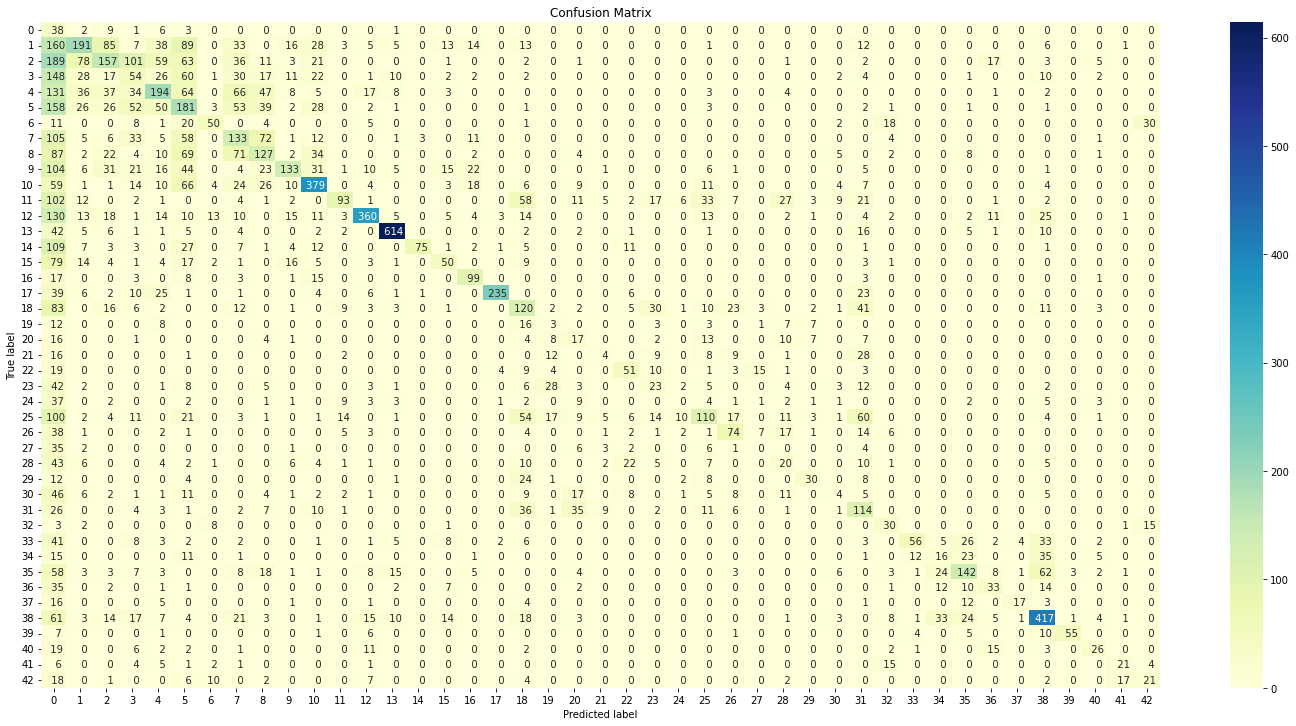

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.1 Suport Vector Machine (SVM)

In [ ]:
# Defining SVM model
svm_clf = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)

In [ ]:
# Fitting SVM
# chạy modle
# SVM: train xong mới test sau đó mới dự đoán
# fit: cho dữ liệu vào modle xử lí => cho máy học
tic = time.perf_counter() #tính thời gian?????
svm_clf.fit(X_train_svm, Y_train) # QUAN TRỌNG
toc = time.perf_counter()
m_svm, s_svm = divmod((toc - tic), 60)
time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))

In [ ]:
s_svm # Nháp chơi


39.77233424899896

In [ ]:
# Predicting values for test data
# dự đoán kết quả của svm_clf khi đưa dữ liệu X_test_svm vào
Y_pred_svm = svm_clf.predict(X_test_svm)

In [ ]:
Y_pred_svm.shape ## coi kết quả thử, kết quả dự đoán tên nhãn của từng ảnh trong test

(12630,)

In [ ]:
# Calculating recall, precision, f1 score and accuracy of SVM
#Tính toán thu hồi, độ chính xác, điểm f1 (nhiều cách khác nhau)=> độ chính xác của SVM
import sklearn.metrics as metrics
recall_svm = metrics.recall_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "Recall", recall_svm]

precision_svm = metrics.precision_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "Precision", precision_svm]

f1_svm = metrics.f1_score(Y_test, Y_pred_svm, average='macro')
df_scores.loc[len(df_scores)] = ["SVM", "F1", f1_svm]

acc_svm=metrics.accuracy_score(Y_test, Y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM", "Accuracy", acc_svm]

df_model.loc[len(df_model)] = ["SVM", acc_svm*100, time_svm]
acc_svm

0.8316706254948535

In [ ]:
# Classification report for SVM
# in ra kết quả do độ chính xác của từng nhãn (0-42) theo nhiều phương pháp tính khác nhau
# Y_test so sánh với Y_pred: so sánh kết quả test với kết quả dự đoán
print("Classification report for SVM classifier {0}:\n{1}\n".format(svm_clf, metrics.classification_report(Y_test, Y_pred_svm)))

Classification report for SVM classifier NuSVC(gamma=1e-05, nu=0.05, random_state=121):
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        60
           1       0.74      0.92      0.82       720
           2       0.82      0.91      0.86       750
           3       0.71      0.81      0.76       450
           4       0.78      0.80      0.79       660
           5       0.77      0.86      0.81       630
           6       0.80      0.56      0.66       150
           7       0.91      0.76      0.83       450
           8       0.87      0.87      0.87       450
           9       0.93      0.84      0.89       480
          10       0.91      0.95      0.93       660
          11       0.85      0.90      0.88       420
          12       0.92      0.92      0.92       690
          13       0.97      0.98      0.97       720
          14       0.95      0.88      0.91       270
          15       0.86      0.82      0.84    

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_svm)

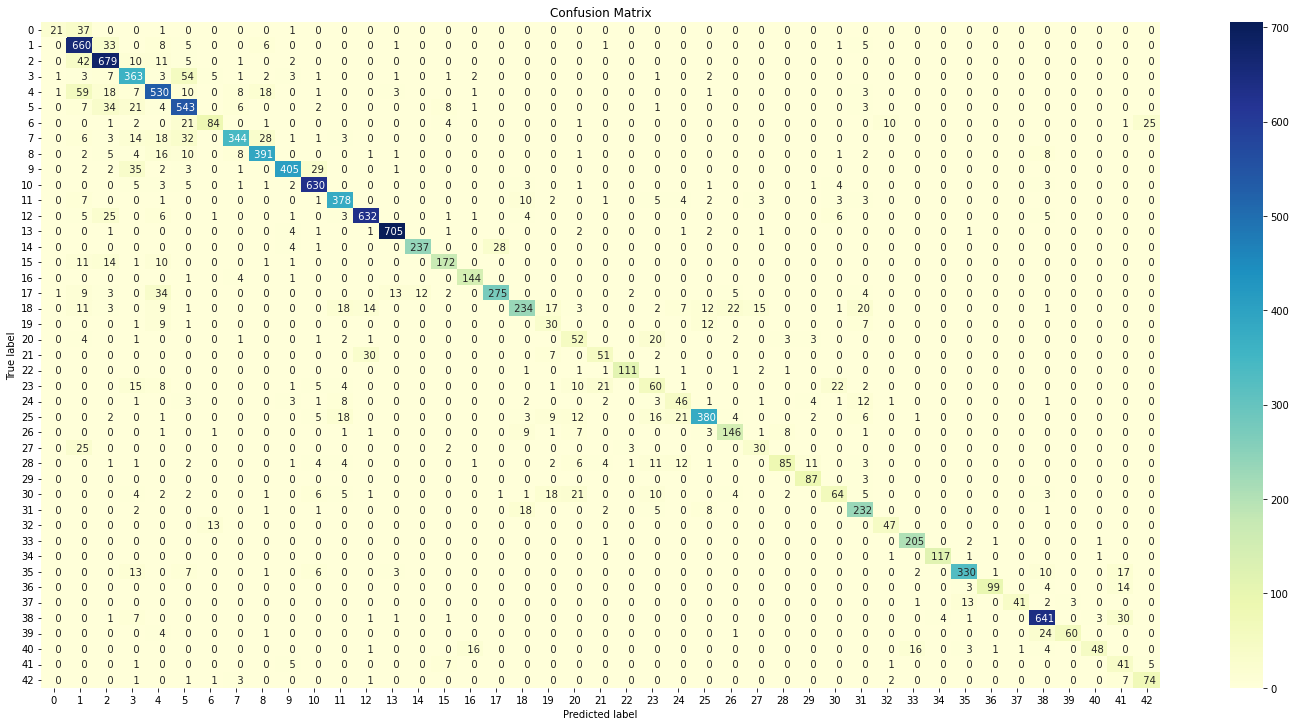

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.2 Random Forest (cây quyết định)


In [ ]:
# Creating list of number of trees

tree_list = [50,100,200,300,500]

In [ ]:
Y_pred_list=[]
time_rf_list=[]
rf_accuracy=[]
for n in tree_list:
    
    # Defining RF model with 'n' trees
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=121, criterion='entropy')
    tic = time.perf_counter()
    
    # Fitting RF
    rf_clf.fit(X_train_rf, Y_train)
    toc = time.perf_counter()
    
    # Predicting values for test data
    Y_pred_list.append(rf_clf.predict(X_test_rf))
    
    # Calculating time taken
    m_rf, s_rf = divmod((toc - tic), 60)
    time_rf_list.append(float(str(str(int(m_rf))+"."+str(int(m_rf)))))
    
    # Calculating accuracy of RF
    rf_accuracy.append(metrics.accuracy_score(Y_test,rf_clf.predict(X_test_rf)))

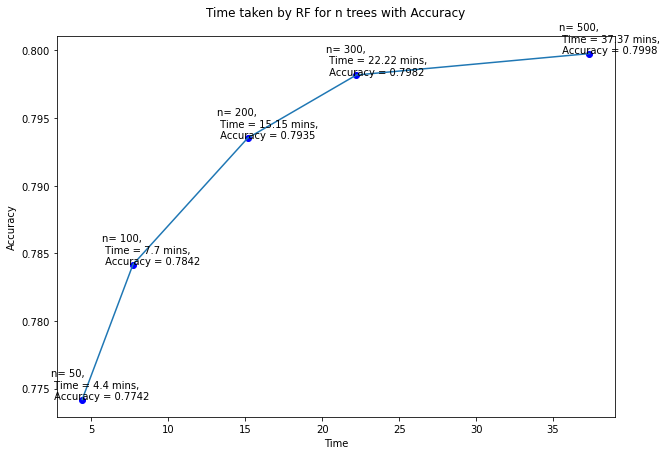

In [ ]:
# Plotting time and accuracy for all RF models
# Epochs vs Accuracy
#Vẽ biểu đồ 
%matplotlib inline
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.plot(time_rf_list,rf_accuracy,'bo')
ax.plot(time_rf_list,rf_accuracy)

ax.set_title('Time taken by RF for n trees with Accuracy',pad=20)
ax.set_xlabel('Time')  
ax.set_ylabel('Accuracy')

for x,y,i in zip(time_rf_list,rf_accuracy,tree_list):

    label = "n= {},\n Time = {} mins,\n Accuracy = {} ".format(i,round(x,4),round(y,4))
    ax.text(x-2,y,label, fontsize=10)
plt.show()  

In [ ]:
# Selecting best RF model
# chọn ra model tốt nhất (lấy từ độ chính xác, thời gian tiêu tốn)
rf_clf = RandomForestClassifier(n_estimators=300, random_state=121,criterion='entropy')
Y_pred_rf = Y_pred_list[3]
time_rf = time_rf_list[3]

acc_rf = rf_accuracy[3]
df_scores.loc[len(df_scores)] = ["RF","Accuracy",acc_rf]

df_model.loc[len(df_model)] = ["RF",acc_rf*100,time_rf]
acc_rf

0.7981789390340459

In [ ]:
# Calculating recall, precision and f1 score for RF

recall_rf = metrics.recall_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "Recall", recall_rf]

precision_rf = metrics.precision_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "Precision", precision_rf]

f1_rf = metrics.f1_score(Y_test, Y_pred_rf, average='macro')
df_scores.loc[len(df_scores)] = ["RF", "F1", f1_rf]

In [ ]:
print("Classification report for RF classifier {0}:\n{1}\n".format(rf_clf, metrics.classification_report(Y_test, Y_pred_rf)))

Classification report for RF classifier RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=121):
              precision    recall  f1-score   support

           0       1.00      0.15      0.26        60
           1       0.71      0.86      0.78       720
           2       0.64      0.77      0.70       750
           3       0.62      0.70      0.66       450
           4       0.71      0.80      0.75       660
           5       0.62      0.64      0.63       630
           6       0.73      0.55      0.63       150
           7       0.72      0.76      0.74       450
           8       0.71      0.55      0.62       450
           9       0.88      0.86      0.87       480
          10       0.91      0.96      0.93       660
          11       0.86      0.96      0.91       420
          12       0.96      0.92      0.94       690
          13       0.97      0.99      0.98       720
          14       0.99      1.00      0.99       270
          15  

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_rf)

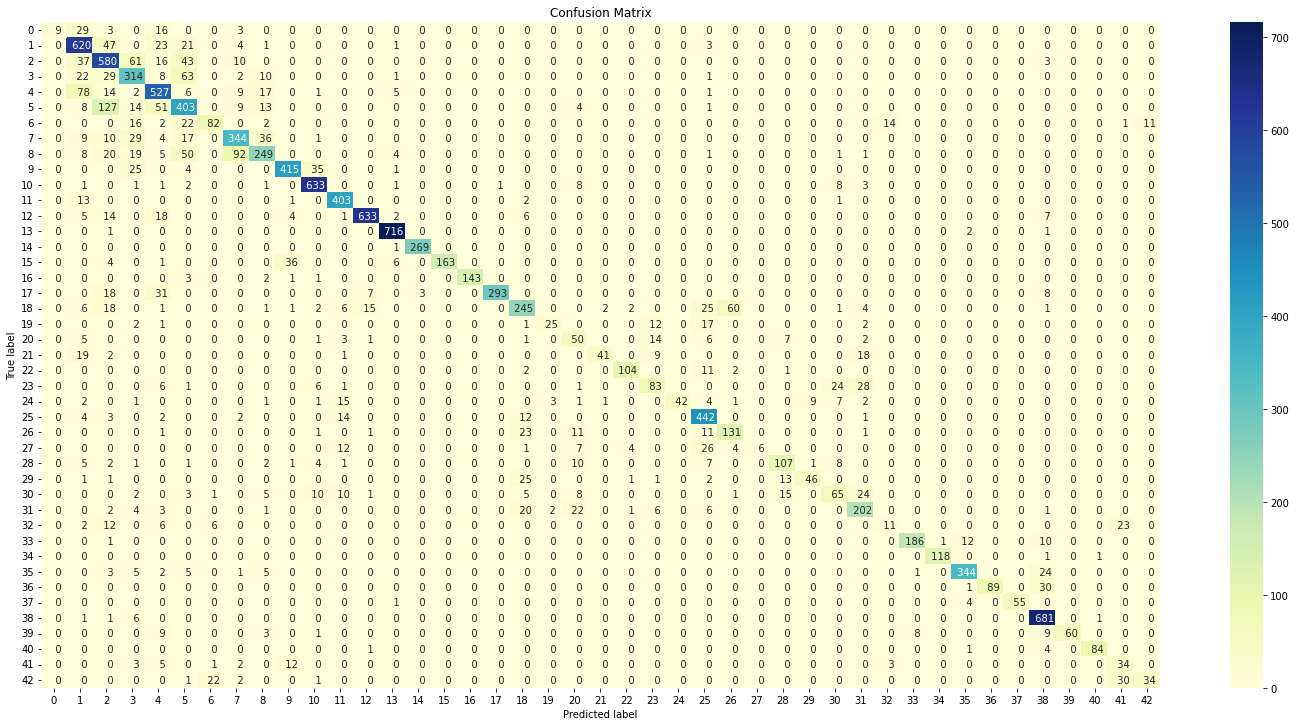

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 6.3 Convolution Neural Network (CNN)

In [ ]:
# Defining CNN model
# CNN: vừa train vừa dự đoán
#Khởi tạo model cnn_clf tự tạo
cnn_clf = Sequential()
cnn_clf.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn_clf.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Dropout(rate=0.25))
cnn_clf.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_clf.add(MaxPool2D(pool_size=(2, 2)))
cnn_clf.add(Dropout(rate=0.25))
cnn_clf.add(Flatten())
cnn_clf.add(Dense(256, activation='relu'))
cnn_clf.add(Dropout(rate=0.5))
cnn_clf.add(Dense(43, activation='softmax'))

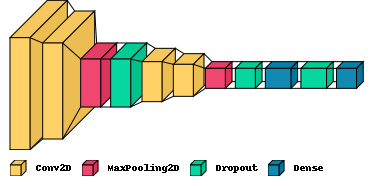

In [ ]:
visualkeras.layered_view(cnn_clf, type_ignore = [layers.Flatten], legend = True)

In [ ]:
#chia train_cnn thành 80 test
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train, Y_train, test_size=0.2, random_state=121)
print(X_train_cnn.shape, X_val_cnn.shape, Y_train_cnn.shape, Y_val_cnn.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [ ]:
Y_train_cnn

array([38,  2, 26, ..., 38, 10, 12])

In [ ]:
Y_train_cnn = to_categorical(Y_train_cnn, 43)
Y_val_cnn = to_categorical(Y_val_cnn, 43)

In [ ]:
# Compilation of the model
cnn_clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting CNN
epochs = 15
history = cnn_clf.fit(X_train_cnn, Y_train_cnn, batch_size=32, epochs=epochs, validation_data=(X_val_cnn, Y_val_cnn))
toc = time.perf_counter()
m_cnn, s_cnn = divmod((toc - tic), 60)
time_cnn=float(str(str(int(m_cnn))+"."+str(int(m_cnn))))

Epoch 1/15
981/981 [==============================] - 165s 166ms/step - loss: 1.8479 - accuracy: 0.5485 - val_loss: 0.3349 - val_accuracy: 0.9158
Epoch 2/15
981/981 [==============================] - 159s 162ms/step - loss: 0.5087 - accuracy: 0.8518 - val_loss: 0.1829 - val_accuracy: 0.9556
Epoch 3/15
981/981 [==============================] - 158s 161ms/step - loss: 0.3336 - accuracy: 0.9015 - val_loss: 0.0861 - val_accuracy: 0.9792
Epoch 4/15
981/981 [==============================] - 158s 161ms/step - loss: 0.2760 - accuracy: 0.9207 - val_loss: 0.0793 - val_accuracy: 0.9823
Epoch 5/15
981/981 [==============================] - 159s 162ms/step - loss: 0.2680 - accuracy: 0.9262 - val_loss: 0.0674 - val_accuracy: 0.9819
Epoch 6/15
981/981 [==============================] - 160s 163ms/step - loss: 0.2283 - accuracy: 0.9380 - val_loss: 0.0551 - val_accuracy: 0.9856
Epoch 7/15
981/981 [==============================] - 159s 162ms/step - loss: 0.2209 - accuracy: 0.9415 - val_loss: 0.0710 -

<Figure size 432x288 with 0 Axes>

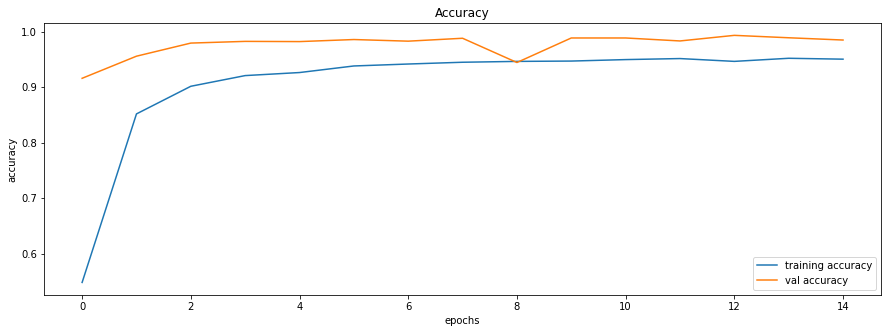

<Figure size 432x288 with 0 Axes>

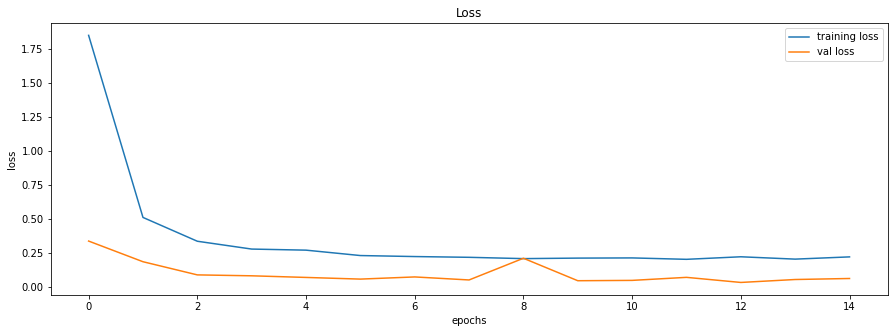

In [ ]:
plt.figure(0)
plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Predicting values for test data
Y_pred_cnn = cnn_clf.predict(X_test_cnn) 

In [ ]:
Y_pred_cnn

array([[3.4340105e-22, 1.4533827e-19, 4.3960883e-22, ..., 3.3610965e-22,
        2.7530860e-18, 3.2252683e-20],
       [1.6814194e-37, 1.0000000e+00, 9.2564722e-22, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.5023807e-04, 6.3675040e-01, 1.3263121e-02, ..., 4.4571451e-04,
        2.1005408e-05, 9.9185570e-07],
       [5.2087057e-10, 1.2238016e-05, 1.0438312e-05, ..., 4.5216814e-07,
        1.2806686e-19, 4.7279533e-12],
       [1.6561495e-14, 3.0995131e-09, 5.4515527e-07, ..., 2.6294544e-09,
        1.8730123e-14, 3.5535431e-12]], dtype=float32)

In [ ]:
Y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
Y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)

In [ ]:
Y_pred_cnn

array([16,  1, 38, ...,  1,  7, 10])

In [ ]:
# Calculating and storing recall, precision, f1 score and accuracy of CNN
recall_cnn = metrics.recall_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "Recall", recall_cnn]

precision_cnn = metrics.precision_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "Precision", precision_cnn]

f1_cnn = metrics.f1_score(Y_test, Y_pred_cnn, average='macro')
df_scores.loc[len(df_scores)] = ["CNN", "F1", f1_cnn]

acc_cnn=metrics.accuracy_score(Y_test, Y_pred_cnn)
df_scores.loc[len(df_scores)] = ["CNN", "Accuracy", acc_cnn]

df_model.loc[len(df_model)] = ["CNN", acc_cnn*100, time_cnn]
acc_cnn

0.9511480601741884

In [ ]:
print("Classification report for CNN classifier {0}:\n{1}\n".format(cnn_clf, metrics.classification_report(Y_test, Y_pred_cnn)))

Classification report for CNN classifier <keras.engine.sequential.Sequential object at 0x7f5ce89d8ad0>:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.91      0.99      0.95       720
           2       0.91      1.00      0.95       750
           3       0.95      0.96      0.95       450
           4       0.98      0.97      0.98       660
           5       0.96      0.89      0.93       630
           6       1.00      0.87      0.93       150
           7       0.94      0.95      0.95       450
           8       0.97      0.93      0.95       450
           9       0.92      1.00      0.96       480
          10       0.99      0.99      0.99       660
          11       0.95      0.96      0.96       420
          12       0.96      0.98      0.97       690
          13       0.99      1.00      0.99       720
          14       1.00      0.99      0.99       270
          15       0.90      1.

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_cnn)

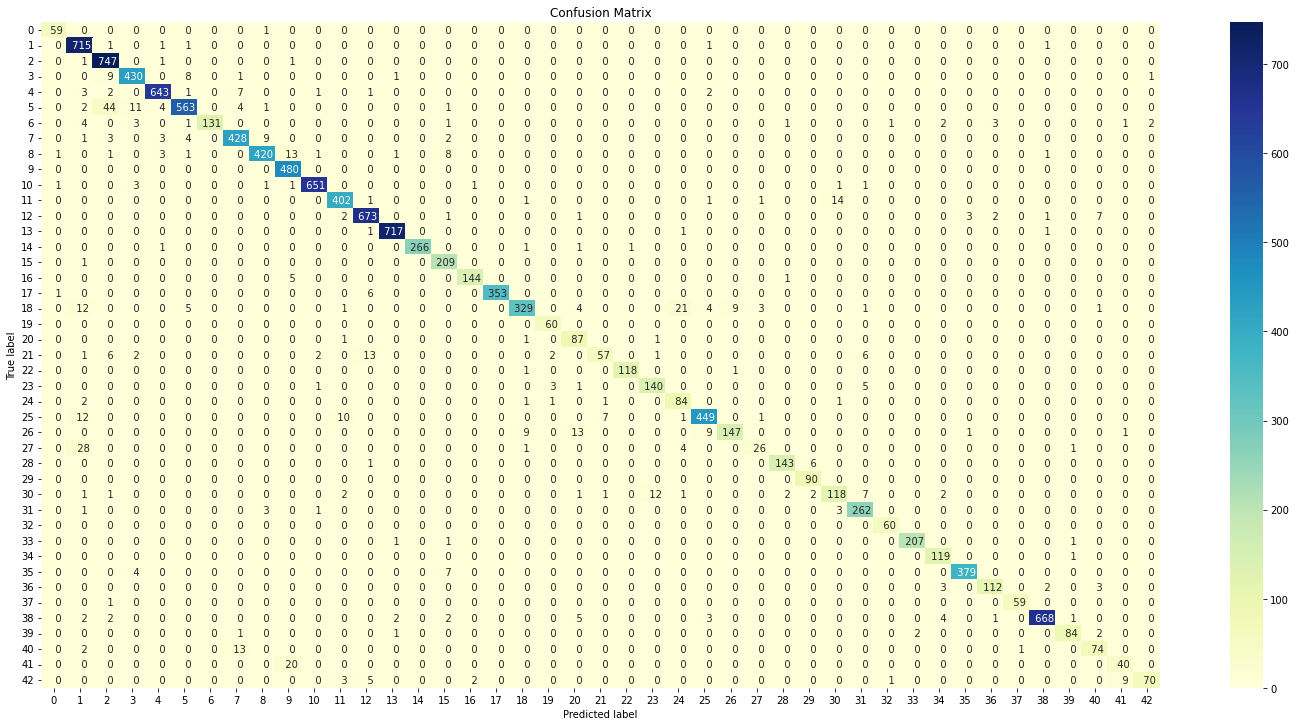

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##XGBOX

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train_xgb = np.copy(X_train)
X_test_xgb = np.copy(X_test)

In [ ]:
X_train_xgb.resize(39209, 32*32*3)
X_test_xgb.resize(12630, 32*32*3)

In [ ]:
scaler=MinMaxScaler((-1,1))
X_train_xgb = scaler.fit_transform(X_train_xgb)
X_test_xgb = scaler.fit_transform(X_test_xgb)

In [ ]:
tic = time.perf_counter()
xgb_clf = XGBClassifier() 
xgb_clf.fit(X_train_xgb, Y_train)
toc = time.perf_counter()
m_xgb, s_xgb = divmod((toc - tic), 60)
time_xgb=float(str(str(int(m_xgb))+"."+str(int(m_xgb))))
print(xgb_clf)

In [ ]:
Y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
Y_pred_xgb

In [ ]:
Y_pred_xgb = np.argmax(Y_pred_xgb, axis = 1)

In [ ]:
# Calculating recall, precision, f1 score and accuracy of XGBoot
recall_xgb = metrics.recall_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "Recall", recall_xgb]

precision_xgb = metrics.precision_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "Precision", precision_xgb]

f1_xgb = metrics.f1_score(Y_test, Y_pred_xgb, average='macro')
df_scores.loc[len(df_scores)] = ["XGBoot", "F1", f1_xgb]

acc_xgb=metrics.accuracy_score(Y_test, Y_pred_xgb)
df_scores.loc[len(df_scores)] = ["XGBoot", "Accuracy", acc_xgb]

df_model.loc[len(df_model)] = ["XGBoot", acc_xgb*100, time_xgb]
acc_xgb

In [ ]:
# tree plot
from xgboost import plot_tree
import matplotlib.pyplot as plt
 
plt.figure(figsize=(19, 5))
plot_tree(xgb_clf)
plt.show()
 
# feature important plot
plt.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_)
plt.show()
 
# default plot
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()

In [ ]:
# Classification report for XGBoot
print("Classification report for XGBoot classifier {0}:\n{1}\n".format(xgb_clf, metrics.classification_report(Y_test, Y_pred_xgb)))

In [ ]:
cm = tf.math.confusion_matrix(Y_test, Y_pred_xgb)
plt.figure(figsize = (20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#7. Summary

In [ ]:
df_model

,Model,Accuracy (%),Time (mins)
0,KNN,36.159937,0.00
1,SVM,83.167063,24.24
2,RF,79.817894,22.22
3,CNN,95.114806,86.86


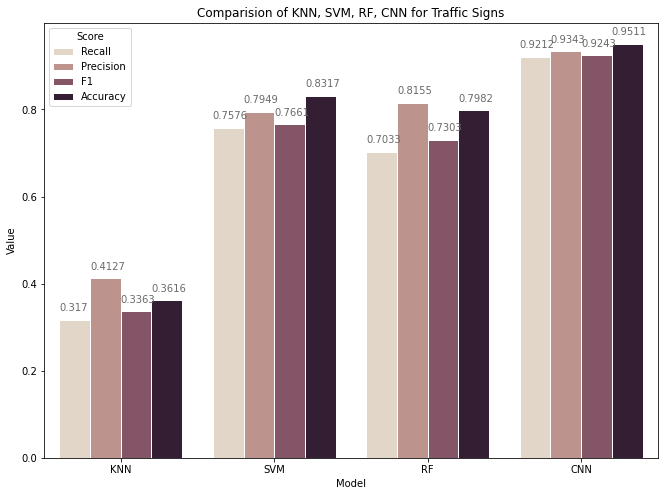

In [ ]:
fig = plt.figure(figsize=(17,8))
ax = plt.axes()
ax = sns.barplot(x="Model", y="Value", hue="Score", data=df_scores, palette="ch:.25",edgecolor="1")
ax.set_title('Comparision of KNN, SVM, RF, CNN for Traffic Signs')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+.02,str(round((i.get_height()), 4)), fontsize=10,color='dimgrey')
plt.show()

# 8. Lưu Model

In [ ]:
cnn_clf.save('traffic_sign_cnn_clf.h5')

#9. Demo


In [ ]:
load_model = tf.keras.models.load_model('traffic_sign_cnn_clf.h5')

In [ ]:
result = load_model.predict(X_test[349:350])

In [ ]:
p = np.argmax(result)

In [ ]:
final = classNames[p]
final

'Children crossing'

'Children crossing'

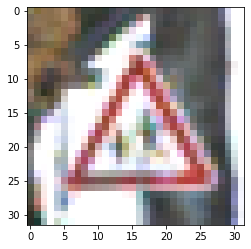

In [ ]:
plt.imshow(X_test[349])
classNames[Y_test[349]]